In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette for consistent visualization
sns.set_palette('husl')

In [2]:
# Load and prepare initial datasets
executive = pd.read_csv('cleaned_executive.csv')

In [3]:
def plot_bar_distribution(data_df, column, group_name, figsize=(12, 8)):
    """
    Creates a bar plot for distribution analysis.
    
    Args:
        data_df (pd.DataFrame): DataFrame containing the data
        column (str): Column name to analyze
        group_name (str): Name of the group for title
        figsize (tuple): Figure size
    """
    if data_df.empty:
        print(f"No data available for {group_name}")
        return

    counts = data_df[column].value_counts()

    plt.figure(figsize=figsize)

    if column == 'zodiac_sign':
        # For zodiac signs, use their corresponding colors from the data
        color_mapping = data_df.set_index('zodiac_sign')['zodiac_color'].to_dict()
        colors = [color_mapping.get(x, 'gray') for x in counts.index]
    else:
        colors = sns.color_palette('husl', len(counts))

    ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=colors, legend=False)

    # Add value labels on bars
    for i, v in enumerate(counts.values):
        ax.text(i, v + 0.05, f"{int(v)}", ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'{group_name} Distribution', fontsize=16)
    plt.tight_layout()
    plt.show()

In [4]:
# Create president and vice president dataframes
prez_df = executive[executive['type'] == 'prez']
viceprez_df = executive[executive['type'] == 'viceprez']

# Create unique presidents/vice presidents dataframes
unique_prez_df = prez_df.drop_duplicates(subset=['full_name'], keep='first')
unique_viceprez_df = viceprez_df.drop_duplicates(subset=['full_name'], keep='first')

# Calculate term counts
prez_term_counts = prez_df['full_name'].value_counts()
viceprez_term_counts = viceprez_df['full_name'].value_counts()

# Identify single and multi-term individuals
single_term_president_names = prez_term_counts[prez_term_counts == 1].index.tolist()
multi_term_president_names = prez_term_counts[prez_term_counts > 1].index.tolist()
single_term_vice_president_names = viceprez_term_counts[viceprez_term_counts == 1].index.tolist()
multi_term_vice_president_names = viceprez_term_counts[viceprez_term_counts > 1].index.tolist()

## Presidential Analysis
Analysis of presidential data including party distribution, gender distribution, and zodiac sign patterns.

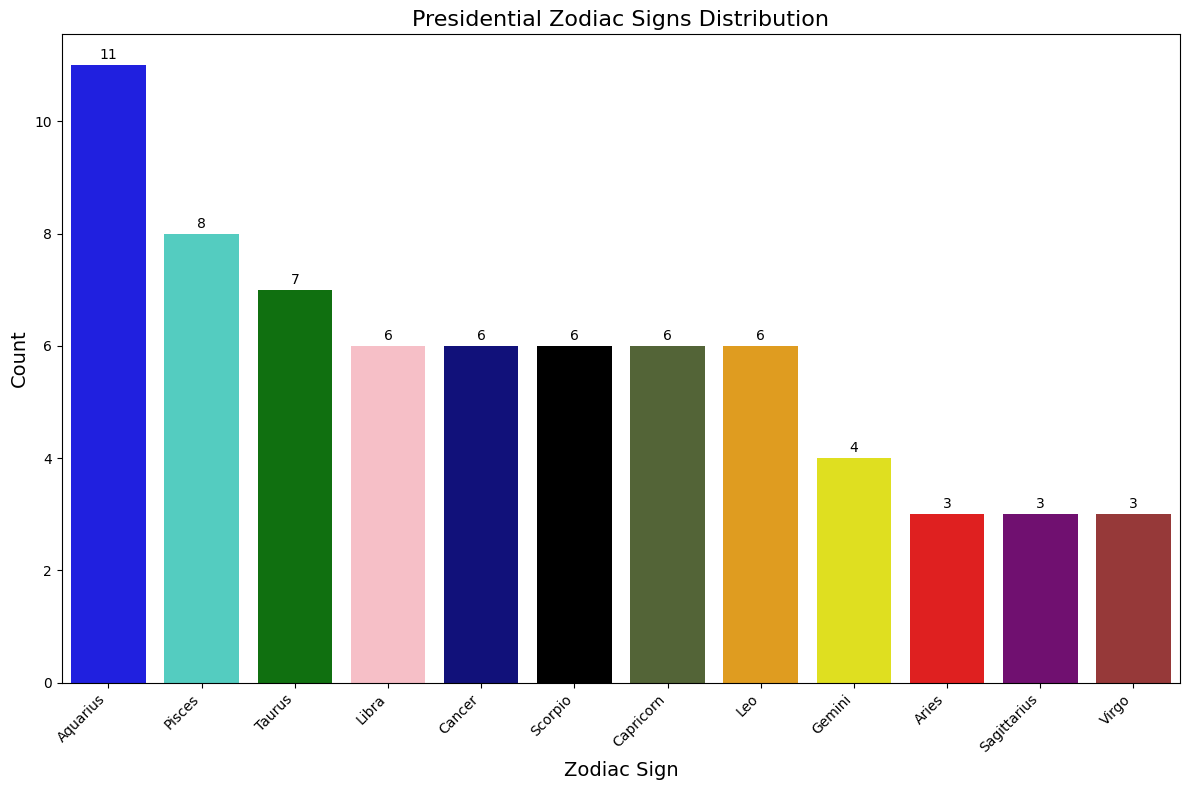

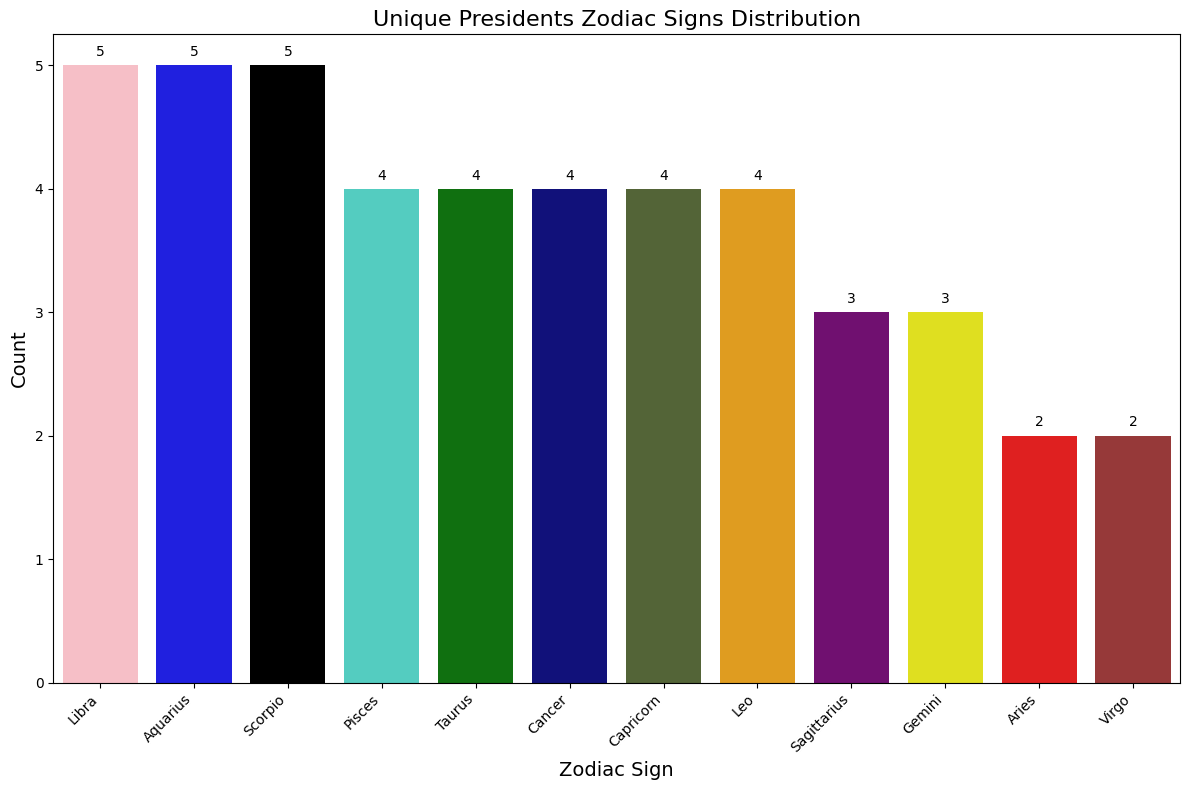

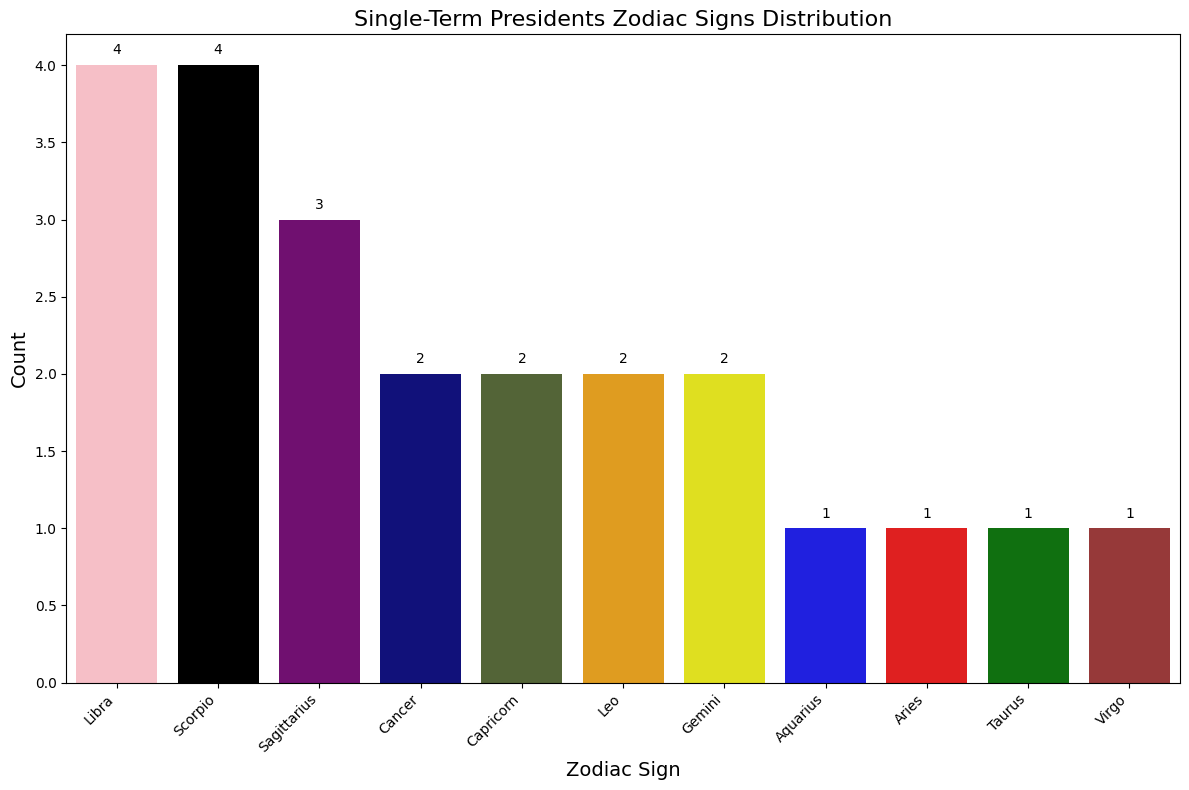

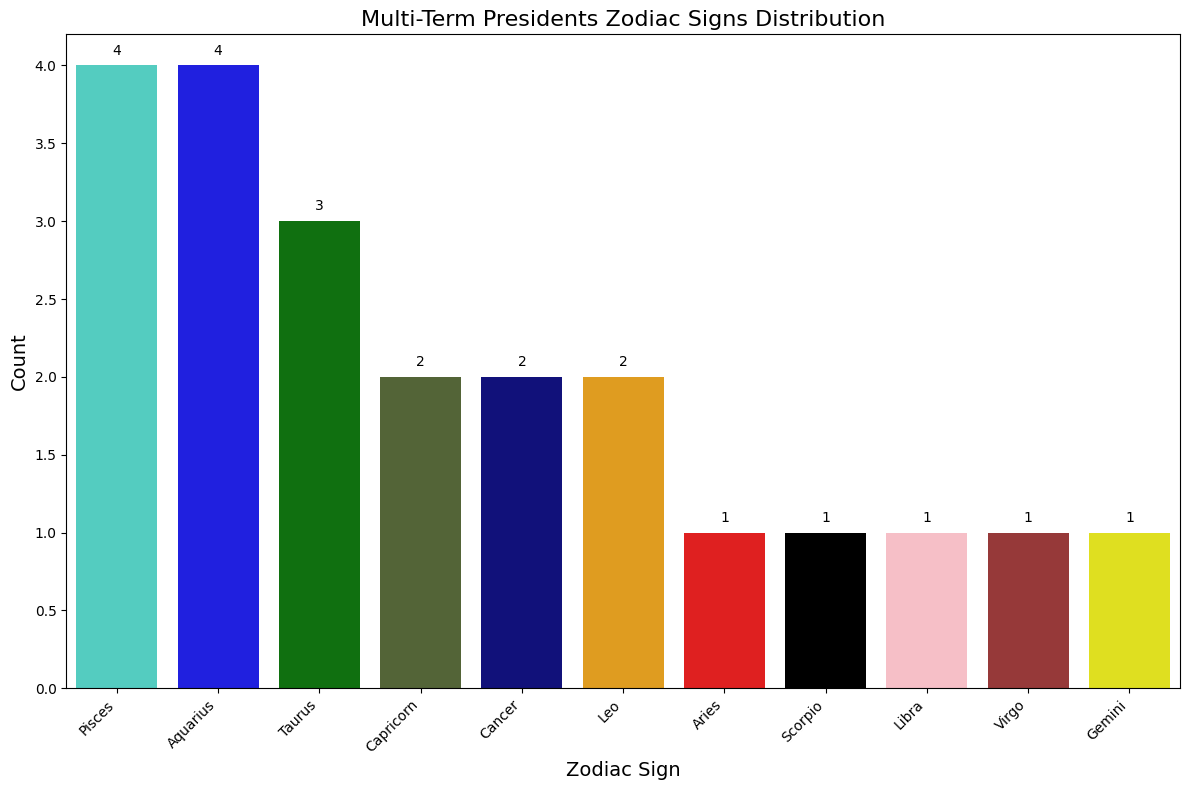

In [5]:
# Presidential visualizations

# Zodiac distributions
plot_bar_distribution(prez_df, 'zodiac_sign', 'Presidential Zodiac Signs')
plot_bar_distribution(unique_prez_df, 'zodiac_sign', 'Unique Presidents Zodiac Signs')

# Single-term presidents zodiac distribution
single_term_prez_df = unique_prez_df[unique_prez_df['full_name'].isin(single_term_president_names)]
plot_bar_distribution(single_term_prez_df, 'zodiac_sign', 'Single-Term Presidents Zodiac Signs')

# Multi-term presidents zodiac distribution
multi_term_prez_df = unique_prez_df[unique_prez_df['full_name'].isin(multi_term_president_names)]
plot_bar_distribution(multi_term_prez_df, 'zodiac_sign', 'Multi-Term Presidents Zodiac Signs')

## Vice Presidential Analysis
Analysis of vice presidential data including gender distribution and zodiac sign patterns.

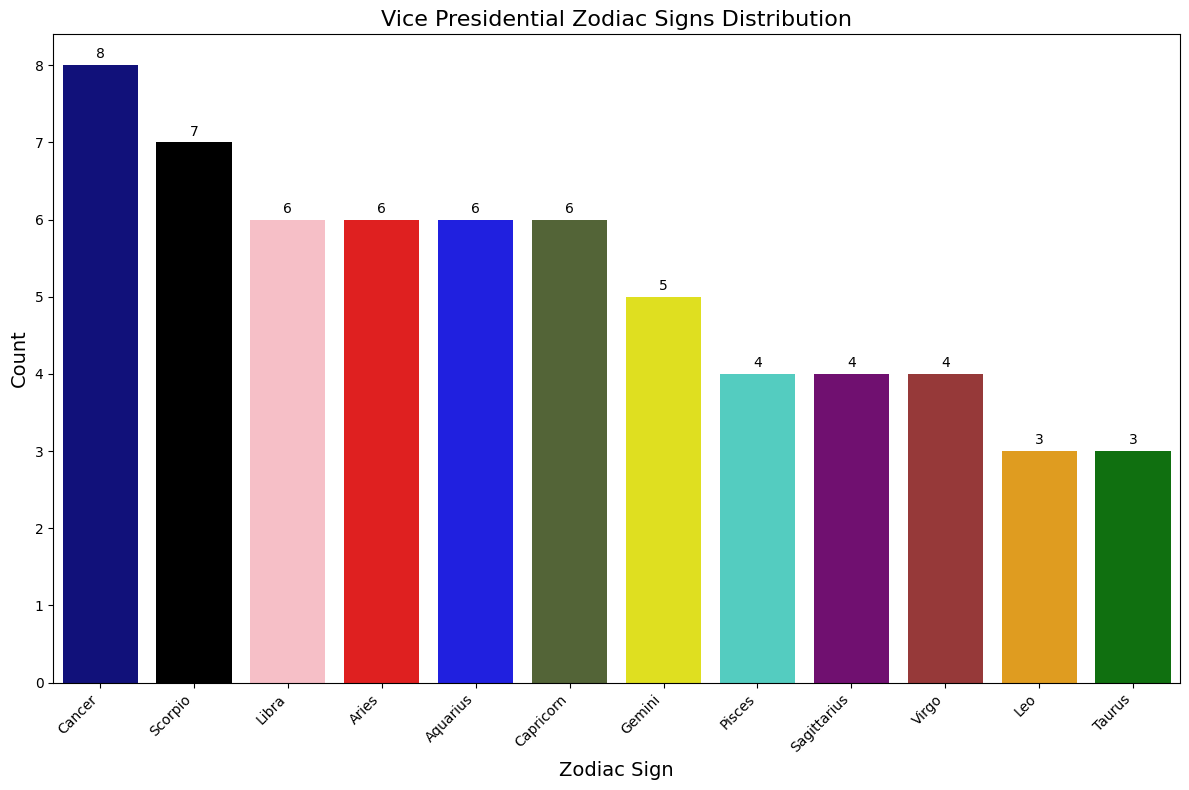

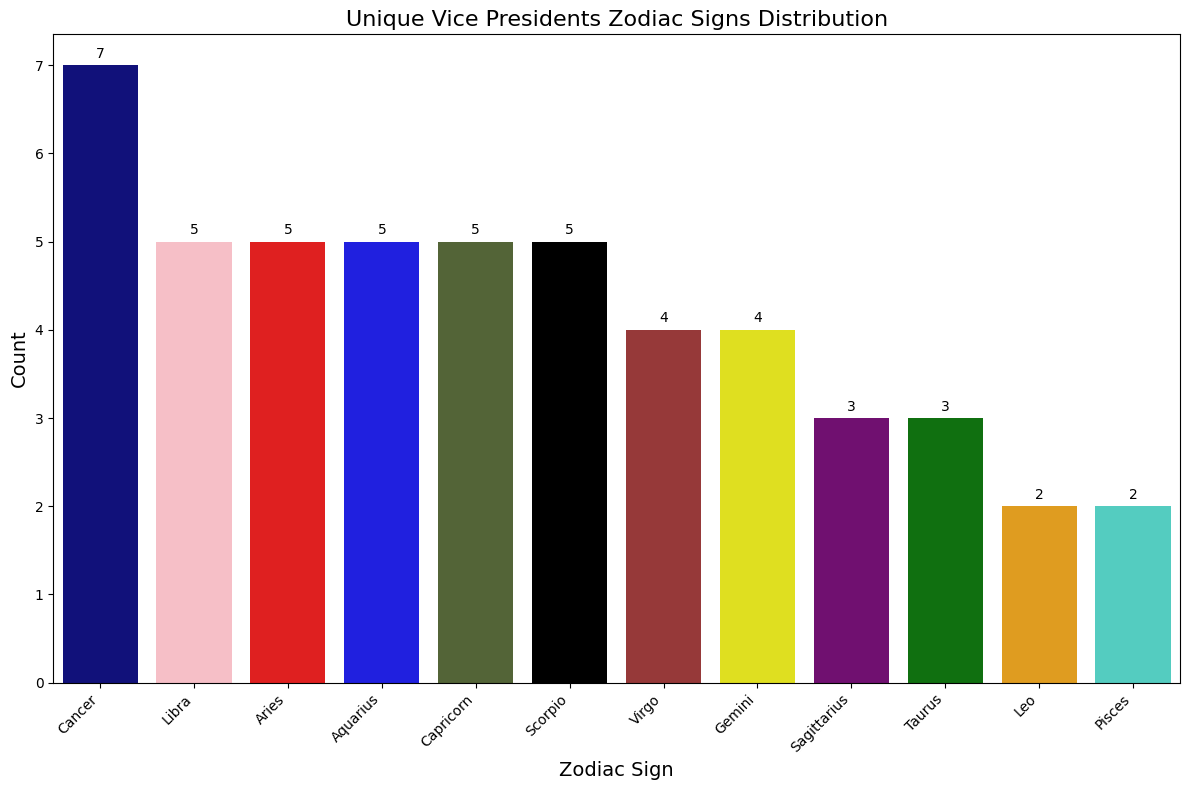

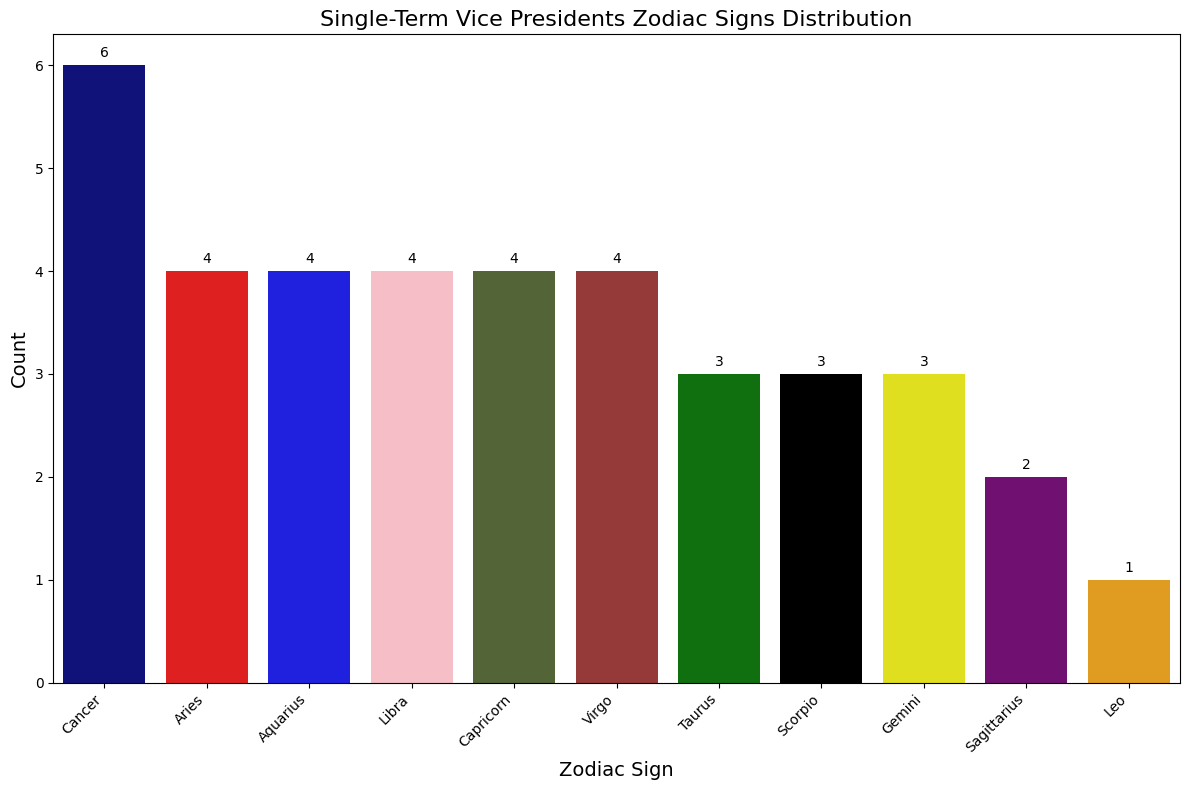

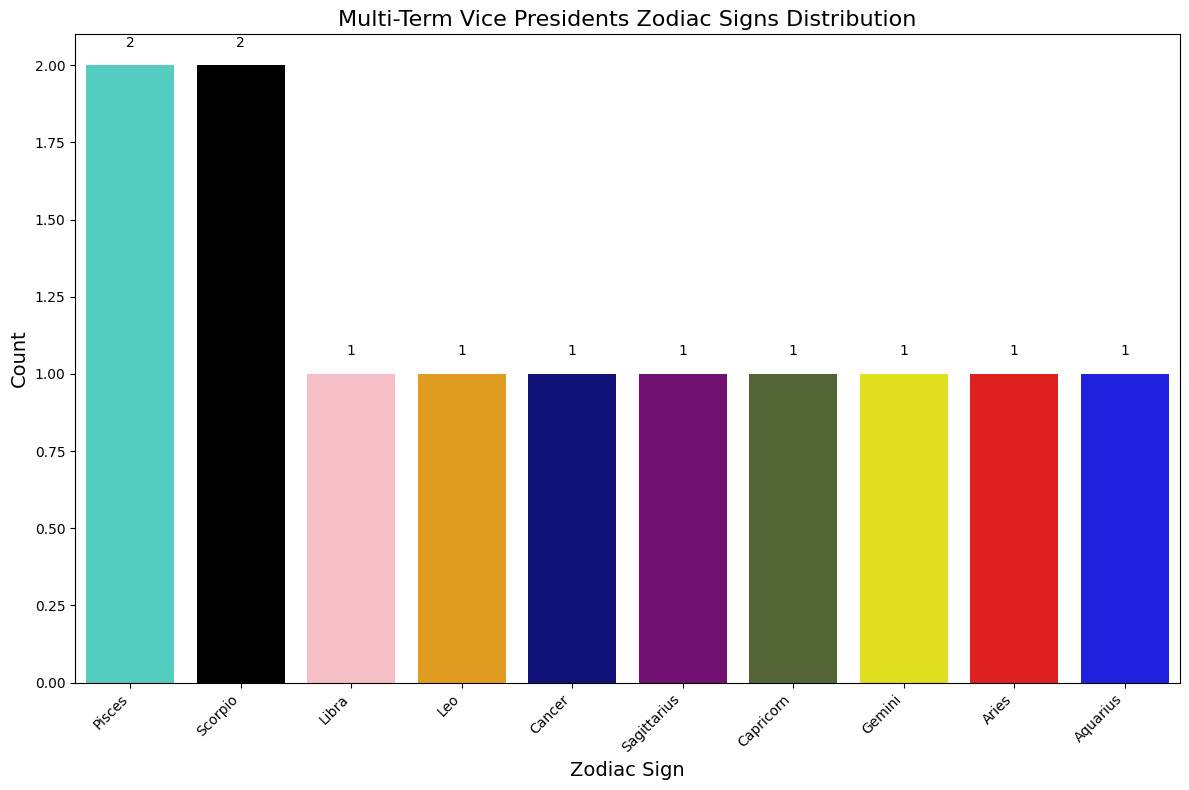

In [6]:
# Vice presidential visualizations

# Zodiac distributions
plot_bar_distribution(viceprez_df, 'zodiac_sign', 'Vice Presidential Zodiac Signs')
plot_bar_distribution(unique_viceprez_df, 'zodiac_sign', 'Unique Vice Presidents Zodiac Signs')

# Single-term vice presidents zodiac distribution
single_term_viceprez_df = unique_viceprez_df[unique_viceprez_df['full_name'].isin(single_term_vice_president_names)]
plot_bar_distribution(single_term_viceprez_df, 'zodiac_sign', 'Single-Term Vice Presidents Zodiac Signs')

# Multi-term vice presidents zodiac distribution
multi_term_viceprez_df = unique_viceprez_df[unique_viceprez_df['full_name'].isin(multi_term_vice_president_names)]
plot_bar_distribution(multi_term_viceprez_df, 'zodiac_sign', 'Multi-Term Vice Presidents Zodiac Signs')

## Comparative Analysis
Comparison of patterns between presidents and vice presidents.

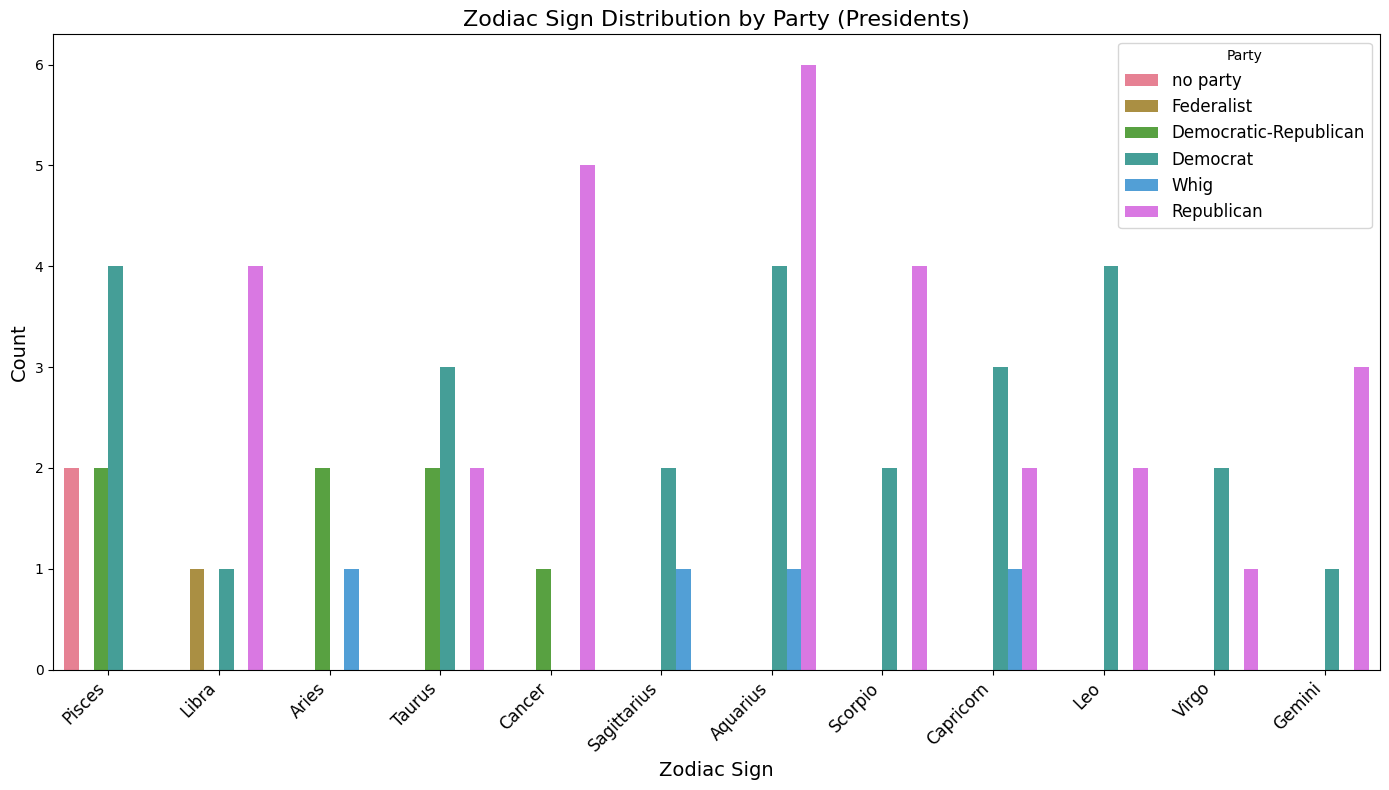

Zodiac Sign Statistics:

All zodiac signs in dataset: ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']

Single-term presidents zodiac signs: ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']
Missing in single-term: ['Pisces']

Multi-term presidents zodiac signs: ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Scorpio', 'Taurus', 'Virgo']
Missing in multi-term: ['Sagittarius']


In [7]:
# Create a countplot for zodiac signs by party
plt.figure(figsize=(14, 8))
sns.countplot(data=prez_df, x='zodiac_sign', hue='party', palette='husl')
plt.title('Zodiac Sign Distribution by Party (Presidents)', fontsize=16)
plt.xlabel('Zodiac Sign', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Party', fontsize=12)
plt.tight_layout()
plt.show()

# Print zodiac sign statistics
all_zodiac_signs = set(unique_prez_df['zodiac_sign'].unique())
single_term_zodiac = set(single_term_prez_df['zodiac_sign'].unique())
multi_term_zodiac = set(multi_term_prez_df['zodiac_sign'].unique())

print("Zodiac Sign Statistics:")
print(f"\nAll zodiac signs in dataset: {sorted(list(all_zodiac_signs))}")
print(f"\nSingle-term presidents zodiac signs: {sorted(list(single_term_zodiac))}")
print(f"Missing in single-term: {sorted(list(all_zodiac_signs - single_term_zodiac))}")
print(f"\nMulti-term presidents zodiac signs: {sorted(list(multi_term_zodiac))}")
print(f"Missing in multi-term: {sorted(list(all_zodiac_signs - multi_term_zodiac))}")

## Summary
This notebook analyzes patterns in U.S. presidential and vice presidential data, focusing on:
1. Party distributions
2. Gender distributions
3. Zodiac sign patterns
4. Term length patterns

Key visualizations include bar plots and pie charts for various distributions, and comparative analyses between different groups.

In [8]:
# Iterate through all columns and print unique values for each
for column in prez_df.columns:
    print(f"Unique values in column '{column}':")
    print(prez_df[column].unique())
    print("\n")

Unique values in column 'full_name':
['George Washington' 'John Adams' 'Thomas Jefferson' 'James Madison'
 'James Monroe' 'John Quincy Adams' 'Andrew Jackson' 'Martin Van Buren'
 'William Henry Harrison' 'John Tyler' 'James Knox Polk' 'Zachary Taylor'
 'Millard Fillmore' 'Franklin Pierce' 'James Buchanan' 'Abraham Lincoln'
 'Andrew Johnson' 'Ulysses Simpson Grant' 'Rutherford Birchard Hayes'
 'James Abram Garfield' 'Chester Alan Arthur' 'Benjamin Harrison'
 'Grover Cleveland' 'William McKinley Jr.' 'Theodore Roosevelt'
 'William Howard Taft' 'Woodrow Wilson' 'Warren Gamaliel Harding'
 'Calvin Coolidge' 'Herbert Clark Hoover' 'Franklin Delano Roosevelt'
 'Harry S. Truman' 'Dwight David Eisenhower' 'John Fitzgerald Kennedy'
 'Lyndon Baines Johnson' 'Richard Milhous Nixon' 'Gerald Rudolph Ford Jr.'
 'James "Jimmy" Earl Carter' 'Ronald Wilson Reagan'
 'George Herbert Walker Bush' 'William "Bill" Jefferson Clinton'
 'George Walker Bush' 'Joseph "Joe" Robinette Biden Jr.'
 'Barack Hussein Ob

In [9]:
# Iterate through all columns and print unique values for each
for column in viceprez_df.columns:
    print(f"Unique values in column '{column}':")
    print(viceprez_df[column].unique())
    print("\n")

Unique values in column 'full_name':
['John Adams' 'Thomas Jefferson' 'Aaron Burr Jr.' 'George Clinton'
 'Elbridge Gerry' 'Daniel D. Tompkins' 'John Caldwell Calhoun'
 'Richard Mentor Johnson' 'Martin Van Buren' 'John Tyler'
 'George Mifflin Dallas' 'Millard Fillmore' 'William Rufus de Vane King'
 'John Cabell Breckinridge' 'Hannibal Hamlin' 'Andrew Johnson'
 'Schuyler Colfax' 'Henry Wilson' 'William Almon Wheeler'
 'Chester Alan Arthur' 'Thomas Andrews Hendricks' 'Levi Parsons Morton'
 'Adlai Ewing Stevenson' 'Garret Augustus Hobart'
 'Charles Warren Fairbanks' 'Theodore Roosevelt'
 'James Schoolcraft Sherman' 'Thomas Riley Marshall' 'Charles Gates Dawes'
 'Calvin Coolidge' 'Charles Curtis' 'John Nance Garner'
 'Henry Agard Wallace' 'Alben William Barkley' 'Harry S. Truman'
 'Hubert Horatio Humphrey Jr.' 'Lyndon Baines Johnson'
 'Spiro Theodore Agnew' 'Richard Milhous Nixon' 'Gerald Rudolph Ford Jr.'
 'Nelson Aldrich Rockefeller' 'Walter Frederick Mondale'
 'James "Dan" Danforth Quayl

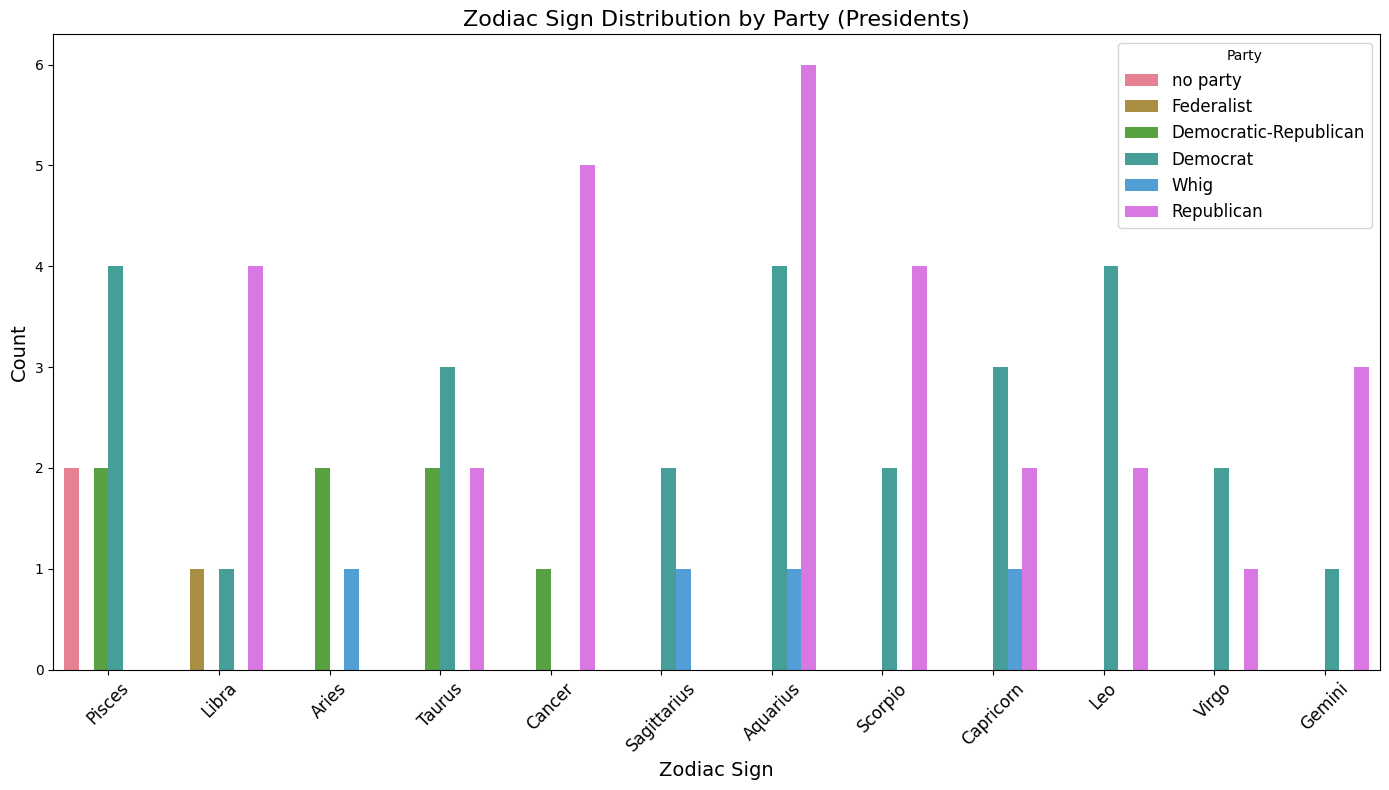

In [10]:
# Create a countplot for zodiac signs by party
plt.figure(figsize=(14, 8))
sns.countplot(data=prez_df, x='zodiac_sign', hue='party', palette='husl')
plt.title('Zodiac Sign Distribution by Party (Presidents)', fontsize=16)
plt.xlabel('Zodiac Sign', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Party', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
# Determine all unique zodiac signs in the dataset
all_zodiac_signs = set(unique_prez_df['zodiac_sign'].unique())

# --- Single-Term Presidents --- 
# Filter unique_prez_df for single-term presidents (assuming single_term_president_names is defined)
single_term_unique_prez_df = unique_prez_df[unique_prez_df['full_name'].isin(single_term_president_names)]

# Get zodiac signs of single-term presidents
zodiac_signs_single_term = set(single_term_unique_prez_df['zodiac_sign'].unique())

# Find zodiac signs not included in single-term presidents
missing_in_single_term = all_zodiac_signs - zodiac_signs_single_term

print(f"All unique zodiac signs in the dataset: {sorted(list(all_zodiac_signs))}")
print(f"Zodiac signs represented among single-term presidents: {sorted(list(zodiac_signs_single_term))}")
if missing_in_single_term:
    print(f"Zodiac signs NOT represented among single-term presidents: {sorted(list(missing_in_single_term))}")
else:
    print("All zodiac signs are represented among single-term presidents.")

print("\n---\n")

# --- Multi-Term Presidents --- 
# Filter unique_prez_df for multi-term presidents (assuming multi_term_president_names is defined)
multi_term_unique_prez_df = unique_prez_df[unique_prez_df['full_name'].isin(multi_term_president_names)]

# Get zodiac signs of multi-term presidents
zodiac_signs_multi_term = set(multi_term_unique_prez_df['zodiac_sign'].unique())

# Find zodiac signs not included in multi-term presidents
missing_in_multi_term = all_zodiac_signs - zodiac_signs_multi_term

print(f"Zodiac signs represented among multi-term presidents: {sorted(list(zodiac_signs_multi_term))}")
if missing_in_multi_term:
    print(f"Zodiac signs NOT represented among multi-term presidents: {sorted(list(missing_in_multi_term))}")
else:
    print("All zodiac signs are represented among multi-term presidents.")

All unique zodiac signs in the dataset: ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']
Zodiac signs represented among single-term presidents: ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']
Zodiac signs NOT represented among single-term presidents: ['Pisces']

---

Zodiac signs represented among multi-term presidents: ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Scorpio', 'Taurus', 'Virgo']
Zodiac signs NOT represented among multi-term presidents: ['Sagittarius']



=== Zodiac Sign Analysis for Presidents ===

Zodiac signs more likely to serve multiple terms:
Pisces: 18.2% more likely (4.0 multi-term vs 0.0 single-term)
Aquarius: 13.9% more likely (4.0 multi-term vs 1.0 single-term)
Taurus: 9.3% more likely (3.0 multi-term vs 1.0 single-term)
Cancer: 0.4% more likely (2.0 multi-term vs 2.0 single-term)
Capricorn: 0.4% more likely (2.0 multi-term vs 2.0 single-term)
Leo: 0.4% more likely (2.0 multi-term vs 2.0 single-term)
Aries: 0.2% more likely (1.0 multi-term vs 1.0 single-term)
Virgo: 0.2% more likely (1.0 multi-term vs 1.0 single-term)

Zodiac signs more likely to serve single terms:
Gemini: 4.2% more likely (2.0 single-term vs 1.0 multi-term)
Libra: 12.9% more likely (4.0 single-term vs 1.0 multi-term)
Scorpio: 12.9% more likely (4.0 single-term vs 1.0 multi-term)
Sagittarius: 13.0% more likely (3.0 single-term vs 0.0 multi-term)

=== Zodiac Sign Analysis for Vice Presidents ===

Zodiac signs more likely to serve multiple terms:
Pisces: 16.7

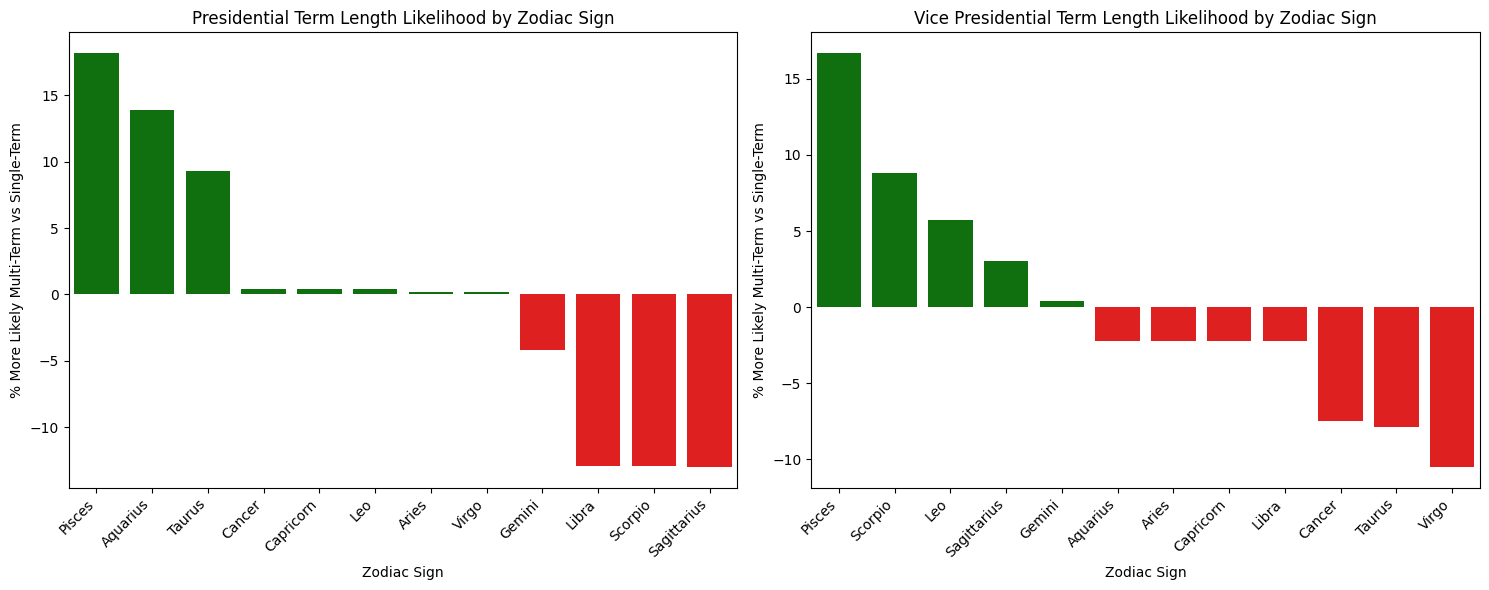

In [12]:
# Create a comparative analysis function
def analyze_term_distribution(zodiac_data_single, zodiac_data_multi, role='Presidents'):
    """
    Analyze and compare zodiac sign distributions between single and multi-term officials.
    
    Args:
        zodiac_data_single (pd.DataFrame): DataFrame containing single-term data
        zodiac_data_multi (pd.DataFrame): DataFrame containing multi-term data
        role (str): Either 'Presidents' or 'Vice Presidents'
    """
    # Calculate proportions for each zodiac sign
    single_counts = zodiac_data_single['zodiac_sign'].value_counts()
    multi_counts = zodiac_data_multi['zodiac_sign'].value_counts()
    
    # Convert to percentages
    single_pct = (single_counts / len(zodiac_data_single) * 100).round(1)
    multi_pct = (multi_counts / len(zodiac_data_multi) * 100).round(1)
    
    # Combine into a DataFrame
    comparison_df = pd.DataFrame({
        'Single_Term_Count': single_counts,
        'Single_Term_Pct': single_pct,
        'Multi_Term_Count': multi_counts,
        'Multi_Term_Pct': multi_pct
    }).fillna(0)
    
    # Calculate which signs are more likely to be multi-term
    comparison_df['Multi_Term_Likelihood'] = (
        comparison_df['Multi_Term_Pct'] - comparison_df['Single_Term_Pct']
    ).round(1)
    
    # Sort by multi-term likelihood
    comparison_df = comparison_df.sort_values('Multi_Term_Likelihood', ascending=False)
    
    print(f"\n=== Zodiac Sign Analysis for {role} ===")
    print("\nZodiac signs more likely to serve multiple terms:")
    multi_term_signs = comparison_df[comparison_df['Multi_Term_Likelihood'] > 0]
    for sign in multi_term_signs.index:
        print(f"{sign}: {multi_term_signs.loc[sign, 'Multi_Term_Likelihood']}% more likely " +
              f"({multi_term_signs.loc[sign, 'Multi_Term_Count']} multi-term vs " +
              f"{multi_term_signs.loc[sign, 'Single_Term_Count']} single-term)")
    
    print("\nZodiac signs more likely to serve single terms:")
    single_term_signs = comparison_df[comparison_df['Multi_Term_Likelihood'] < 0]
    for sign in single_term_signs.index:
        print(f"{sign}: {abs(single_term_signs.loc[sign, 'Multi_Term_Likelihood'])}% more likely " +
              f"({single_term_signs.loc[sign, 'Single_Term_Count']} single-term vs " +
              f"{single_term_signs.loc[sign, 'Multi_Term_Count']} multi-term)")
    
    return comparison_df

# Analyze presidents
prez_comparison = analyze_term_distribution(single_term_prez_df, multi_term_prez_df, 'Presidents')

# Analyze vice presidents
vp_comparison = analyze_term_distribution(single_term_viceprez_df, multi_term_viceprez_df, 'Vice Presidents')

# Prepare data for visualization
prez_plot_data = prez_comparison.copy()
prez_plot_data.index.name = 'Zodiac_Sign'
prez_plot_data = prez_plot_data.reset_index()

vp_plot_data = vp_comparison.copy()
vp_plot_data.index.name = 'Zodiac_Sign'
vp_plot_data = vp_plot_data.reset_index()

# Create visualization of the comparisons
plt.figure(figsize=(15, 6))

# Presidential plot
plt.subplot(1, 2, 1)
sns.barplot(data=prez_plot_data, x='Zodiac_Sign', y='Multi_Term_Likelihood',
            hue='Zodiac_Sign', palette=['green' if x > 0 else 'red' for x in prez_plot_data['Multi_Term_Likelihood']], legend=False)
plt.title('Presidential Term Length Likelihood by Zodiac Sign')
plt.xlabel('Zodiac Sign')
plt.ylabel('% More Likely Multi-Term vs Single-Term')
plt.xticks(rotation=45, ha='right')

# Vice Presidential plot
plt.subplot(1, 2, 2)
sns.barplot(data=vp_plot_data, x='Zodiac_Sign', y='Multi_Term_Likelihood',
            hue='Zodiac_Sign', palette=['green' if x > 0 else 'red' for x in vp_plot_data['Multi_Term_Likelihood']], legend=False)
plt.title('Vice Presidential Term Length Likelihood by Zodiac Sign')
plt.xlabel('Zodiac Sign')
plt.ylabel('% More Likely Multi-Term vs Single-Term')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Analysis of Presidents Serving More Than Two Terms
Identifying presidents who served more than the typical two-term limit.

In [13]:
# Get presidents with more than 2 terms
multiple_terms = prez_df['full_name'].value_counts()
more_than_two = multiple_terms[multiple_terms > 2]

if len(more_than_two) > 0:
    print("Presidents who served more than 2 terms:")
    for name, terms in more_than_two.items():
        # Get the date information for this president
        president_terms = prez_df[prez_df['full_name'] == name].sort_values('start_term')
        print(f"\n{name}: {terms} terms")
        print("Term details:")
        for _, term in president_terms.iterrows():
            print(f"- {term['start_term']} to {term['end_term']}")
            print(f"  Party: {term['party']}")
            print(f"  Age during term: {term['age_start']} to {term['age_end']}")
else:
    print("No presidents served more than 2 terms in this dataset.")

# Calculate total years served for these presidents
if len(more_than_two) > 0:
    print("\nTotal years in office:")
    for name in more_than_two.index:
        president_data = prez_df[prez_df['full_name'] == name]
        total_years = president_data['total_duration_years'].sum()
        print(f"{name}: {total_years:.1f} years")

Presidents who served more than 2 terms:

Franklin Delano Roosevelt: 4 terms
Term details:
- 1933-03-04 to 1937-01-20
  Party: Democrat
  Age during term: 51 to 54
- 1937-01-20 to 1941-01-20
  Party: Democrat
  Age during term: 54 to 58
- 1941-01-20 to 1945-01-20
  Party: Democrat
  Age during term: 58 to 62
- 1945-01-20 to 1945-04-12
  Party: Democrat
  Age during term: 62 to 63

Total years in office:
Franklin Delano Roosevelt: 12.1 years


## Analysis of President with Most Terms
Identifying the zodiac sign and details of the president who served the most terms.

In [14]:
# Find the president with the most terms
term_counts = prez_df['full_name'].value_counts()
president_most_terms = term_counts.index[0]
number_of_terms = term_counts[0]

# Get the president's information
president_info = prez_df[prez_df['full_name'] == president_most_terms].iloc[0]

print(f"President with most terms: {president_most_terms}")
print(f"Number of terms served: {number_of_terms}")
print(f"Zodiac Sign: {president_info['zodiac_sign']}")
print(f"Birth Date: {president_info['birthdate']}")
print(f"Total Years in Office: {prez_df[prez_df['full_name'] == president_most_terms]['total_duration_years'].sum():.1f} years")

# Get all terms served
print("\nTerm Details:")
terms = prez_df[prez_df['full_name'] == president_most_terms].sort_values('start_term')
for _, term in terms.iterrows():
    print(f"- {term['start_term']} to {term['end_term']} ({term['party']})")

President with most terms: Franklin Delano Roosevelt
Number of terms served: 4
Zodiac Sign: Aquarius
Birth Date: 1882-01-30
Total Years in Office: 12.1 years

Term Details:
- 1933-03-04 to 1937-01-20 (Democrat)
- 1937-01-20 to 1941-01-20 (Democrat)
- 1941-01-20 to 1945-01-20 (Democrat)
- 1945-01-20 to 1945-04-12 (Democrat)


/var/folders/54/wyyc2qvn4xl9gz4l_6_nzdn40000gn/T/ipykernel_32489/691808399.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_terms = term_counts[0]


## Predictive Analysis of Zodiac Signs
Analyzing the probability patterns of multi-term service based on zodiac signs.

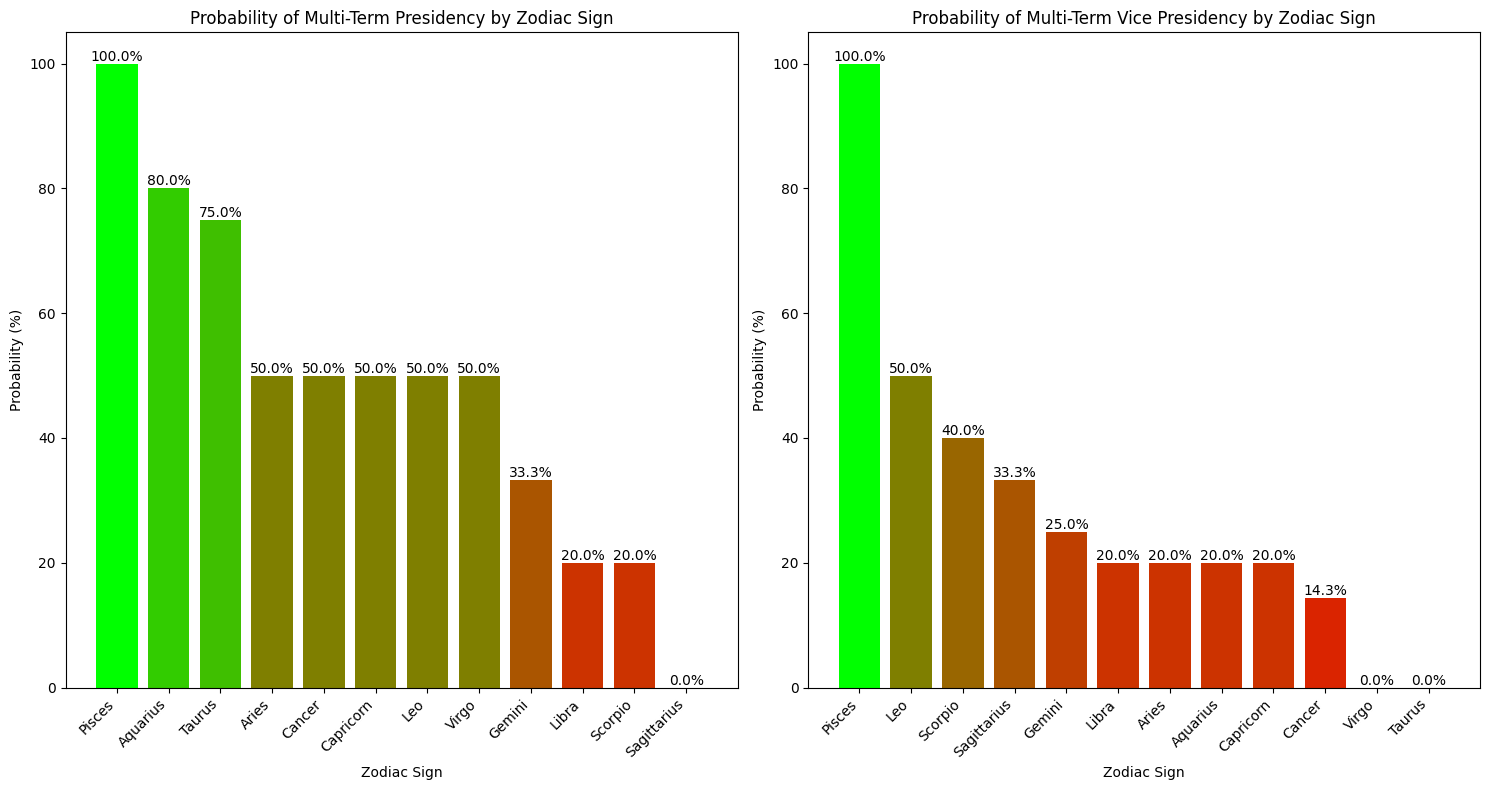


Presidential Multi-Term Probability by Zodiac Sign:
Zodiac_Sign  Total_People  Multi_Term_People  Probability
     Pisces             4                  4     1.000000
   Aquarius             5                  4     0.800000
     Taurus             4                  3     0.750000
      Aries             2                  1     0.500000
     Cancer             4                  2     0.500000
  Capricorn             4                  2     0.500000
        Leo             4                  2     0.500000
      Virgo             2                  1     0.500000
     Gemini             3                  1     0.333333
      Libra             5                  1     0.200000
    Scorpio             5                  1     0.200000
Sagittarius             3                  0     0.000000

Vice Presidential Multi-Term Probability by Zodiac Sign:
Zodiac_Sign  Total_People  Multi_Term_People  Probability
     Pisces             2                  2     1.000000
        Leo        

In [15]:
# Calculate probability of multi-term service for each zodiac sign
def calculate_zodiac_probabilities(df, role='President'):
    # Group by zodiac sign and calculate probabilities
    zodiac_stats = pd.DataFrame()
    
    for sign in df['zodiac_sign'].unique():
        sign_data = df[df['zodiac_sign'] == sign]
        total_people = len(sign_data['full_name'].unique())
        multi_term_people = len(sign_data[sign_data['full_name'].isin(
            df['full_name'].value_counts()[df['full_name'].value_counts() > 1].index
        )]['full_name'].unique())
        
        zodiac_stats = pd.concat([zodiac_stats, pd.DataFrame({
            'Zodiac_Sign': [sign],
            'Total_People': [total_people],
            'Multi_Term_People': [multi_term_people],
            'Probability': [multi_term_people / total_people if total_people > 0 else 0]
        })])
    
    zodiac_stats = zodiac_stats.sort_values('Probability', ascending=False)
    return zodiac_stats

# Calculate probabilities for presidents and vice presidents
prez_probabilities = calculate_zodiac_probabilities(prez_df, 'President')
vp_probabilities = calculate_zodiac_probabilities(viceprez_df, 'Vice President')

# Create visualization
plt.figure(figsize=(15, 8))

# Create custom color maps based on probability
prez_colors = ['#' + hex(int(255 * (1-p)))[2:].zfill(2) + 
               hex(int(255 * p))[2:].zfill(2) + '00' 
               for p in prez_probabilities['Probability']]
vp_colors = ['#' + hex(int(255 * (1-p)))[2:].zfill(2) + 
             hex(int(255 * p))[2:].zfill(2) + '00'
             for p in vp_probabilities['Probability']]

# Plot Presidential probabilities
plt.subplot(1, 2, 1)
bars = plt.bar(prez_probabilities['Zodiac_Sign'], 
               prez_probabilities['Probability'] * 100,
               color=prez_colors)

plt.title('Probability of Multi-Term Presidency by Zodiac Sign', fontsize=12)
plt.xlabel('Zodiac Sign')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Plot Vice Presidential probabilities
plt.subplot(1, 2, 2)
bars = plt.bar(vp_probabilities['Zodiac_Sign'],
               vp_probabilities['Probability'] * 100,
               color=vp_colors)

plt.title('Probability of Multi-Term Vice Presidency by Zodiac Sign', fontsize=12)
plt.xlabel('Zodiac Sign')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nPresidential Multi-Term Probability by Zodiac Sign:")
print(prez_probabilities.to_string(index=False))
print("\nVice Presidential Multi-Term Probability by Zodiac Sign:")
print(vp_probabilities.to_string(index=False))

## Predictive Visualization for Future Leaders
Analyzing historical patterns to predict zodiac signs of future presidents and vice presidents, considering:
1. Historical frequency of zodiac signs
2. Recent trends in zodiac sign representation
3. Probability weighting based on past success rates

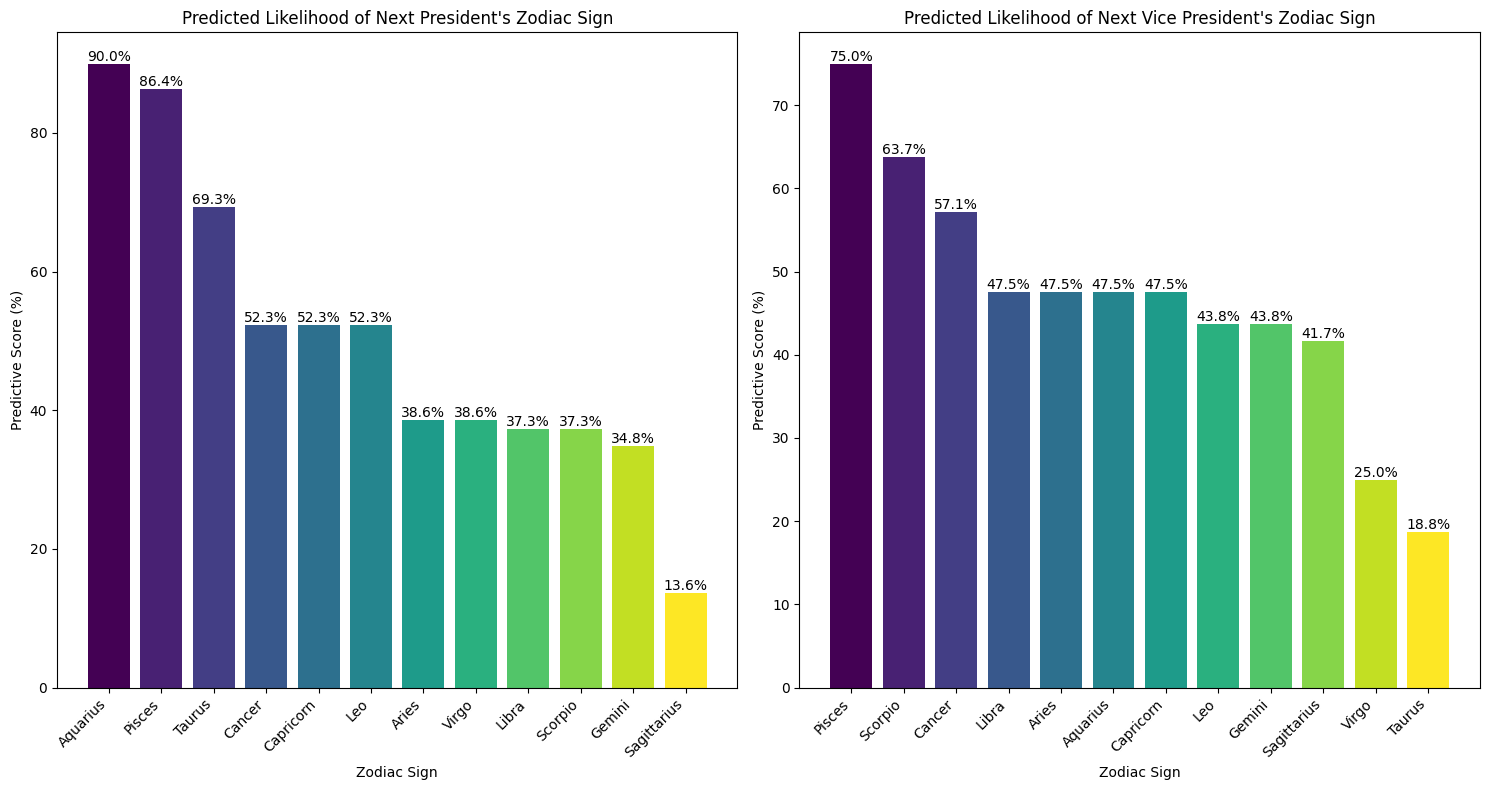


Top 3 Most Likely Zodiac Signs for Next President:
Aquarius: 90.0% likelihood
Pisces: 86.4% likelihood
Taurus: 69.3% likelihood

Top 3 Most Likely Zodiac Signs for Next Vice President:
Pisces: 75.0% likelihood
Scorpio: 63.7% likelihood
Cancer: 57.1% likelihood


In [16]:
# Calculate historical trends and future predictions
def calculate_predictive_scores(df, role='President'):
    # Get basic probabilities
    basic_probs = calculate_zodiac_probabilities(df, role)
    
    # Add recency weight - more recent leaders get higher weight
    df_sorted = df.sort_values('start_term', ascending=True)
    recent_counts = df_sorted.groupby('zodiac_sign').size().reset_index()
    recent_counts.columns = ['Zodiac_Sign', 'Recent_Count']
    
    # Merge probabilities with recent counts
    merged_stats = basic_probs.merge(recent_counts, on='Zodiac_Sign')
    
    # Calculate weighted score (50% probability, 50% recency)
    merged_stats['Predictive_Score'] = (
        0.5 * merged_stats['Probability'] + 
        0.5 * (merged_stats['Recent_Count'] / merged_stats['Recent_Count'].max())
    )
    
    return merged_stats.sort_values('Predictive_Score', ascending=False)

# Calculate predictive scores
prez_predictions = calculate_predictive_scores(prez_df, 'President')
vp_predictions = calculate_predictive_scores(viceprez_df, 'Vice President')

# Create visualization
plt.figure(figsize=(15, 8))

# Plot Presidential predictions
plt.subplot(1, 2, 1)
bars = plt.bar(prez_predictions['Zodiac_Sign'], 
               prez_predictions['Predictive_Score'] * 100,
               color=plt.cm.viridis(np.linspace(0, 1, len(prez_predictions))))

plt.title('Predicted Likelihood of Next President\'s Zodiac Sign', fontsize=12)
plt.xlabel('Zodiac Sign')
plt.ylabel('Predictive Score (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Plot Vice Presidential predictions
plt.subplot(1, 2, 2)
bars = plt.bar(vp_predictions['Zodiac_Sign'],
               vp_predictions['Predictive_Score'] * 100,
               color=plt.cm.viridis(np.linspace(0, 1, len(vp_predictions))))

plt.title('Predicted Likelihood of Next Vice President\'s Zodiac Sign', fontsize=12)
plt.xlabel('Zodiac Sign')
plt.ylabel('Predictive Score (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print top 3 most likely zodiac signs for each role
print("\nTop 3 Most Likely Zodiac Signs for Next President:")
for _, row in prez_predictions.head(3).iterrows():
    print(f"{row['Zodiac_Sign']}: {row['Predictive_Score']*100:.1f}% likelihood")
    
print("\nTop 3 Most Likely Zodiac Signs for Next Vice President:")
for _, row in vp_predictions.head(3).iterrows():
    print(f"{row['Zodiac_Sign']}: {row['Predictive_Score']*100:.1f}% likelihood")

## Predictive Analysis for Next President and Vice President
Analyzing historical patterns with weighted recency to predict the zodiac signs of future leaders.

In [ ]:
def calculate_predictive_scores(df, role='President'):
    # Sort by term start date to get chronological order
    df_sorted = df.sort_values('start_term')
    
    # Calculate weights based on recency (more recent = higher weight)
    num_terms = len(df_sorted)
    weights = np.linspace(0.5, 1.0, num_terms)  # Linear increase in weights
    
    # Calculate weighted scores for each zodiac sign
    zodiac_scores = {}
    for sign in df_sorted['zodiac_sign'].unique():
        # Get indices where this zodiac sign appears
        sign_indices = df_sorted['zodiac_sign'] == sign
        # Sum the weights for this sign
        score = weights[sign_indices].sum()
        # Add bonus for multi-term success
        multi_term_bonus = len(set(df_sorted[sign_indices]['full_name'])) / len(df_sorted[sign_indices])
        score *= multi_term_bonus
        zodiac_scores[sign] = score
    
    # Convert to DataFrame and normalize scores to percentages
    scores_df = pd.DataFrame(list(zodiac_scores.items()), columns=['Zodiac_Sign', 'Score'])
    scores_df['Probability'] = scores_df['Score'] / scores_df['Score'].sum() * 100
    scores_df = scores_df.sort_values('Probability', ascending=False)
    
    return scores_df

# Calculate predictive scores
prez_predictions = calculate_predictive_scores(prez_df, 'President')
vp_predictions = calculate_predictive_scores(viceprez_df, 'Vice President')

# Create visualization
plt.figure(figsize=(15, 8))

# Create custom color gradients based on probability
max_prob_prez = prez_predictions['Probability'].max()
max_prob_vp = vp_predictions['Probability'].max()

prez_colors = plt.cm.YlOrRd(prez_predictions['Probability'] / max_prob_prez)
vp_colors = plt.cm.YlOrRd(vp_predictions['Probability'] / max_prob_vp)

# Plot Presidential predictions
plt.subplot(1, 2, 1)
bars = plt.bar(prez_predictions['Zodiac_Sign'], 
               prez_predictions['Probability'],
               color=prez_colors)

plt.title('Predicted Probability of Next President\'s Zodiac Sign', fontsize=12)
plt.xlabel('Zodiac Sign')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Plot Vice Presidential predictions
plt.subplot(1, 2, 2)
bars = plt.bar(vp_predictions['Zodiac_Sign'],
               vp_predictions['Probability'],
               color=vp_colors)

plt.title('Predicted Probability of Next Vice President\'s Zodiac Sign', fontsize=12)
plt.xlabel('Zodiac Sign')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed predictions
print("\nTop 3 Most Likely Zodiac Signs for Next President:")
for _, row in prez_predictions.head(3).iterrows():
    print(f"{row['Zodiac_Sign']}: {row['Probability']:.1f}%")

print("\nTop 3 Most Likely Zodiac Signs for Next Vice President:")
for _, row in vp_predictions.head(3).iterrows():
    print(f"{row['Zodiac_Sign']}: {row['Probability']:.1f}%")

## Analysis of Multi-Term President-VP Duos
Analyzing the zodiac sign combinations of presidents and vice presidents who served multiple terms together. The scatter plot shows:
- Each point represents a successful President-VP partnership
- X-axis: President's zodiac sign
- Y-axis: Vice President's zodiac sign
- Point size: Number of terms served together (larger = more terms)
- Year labels: When the partnership began

This visualization helps identify which zodiac sign combinations led to long-lasting executive partnerships.

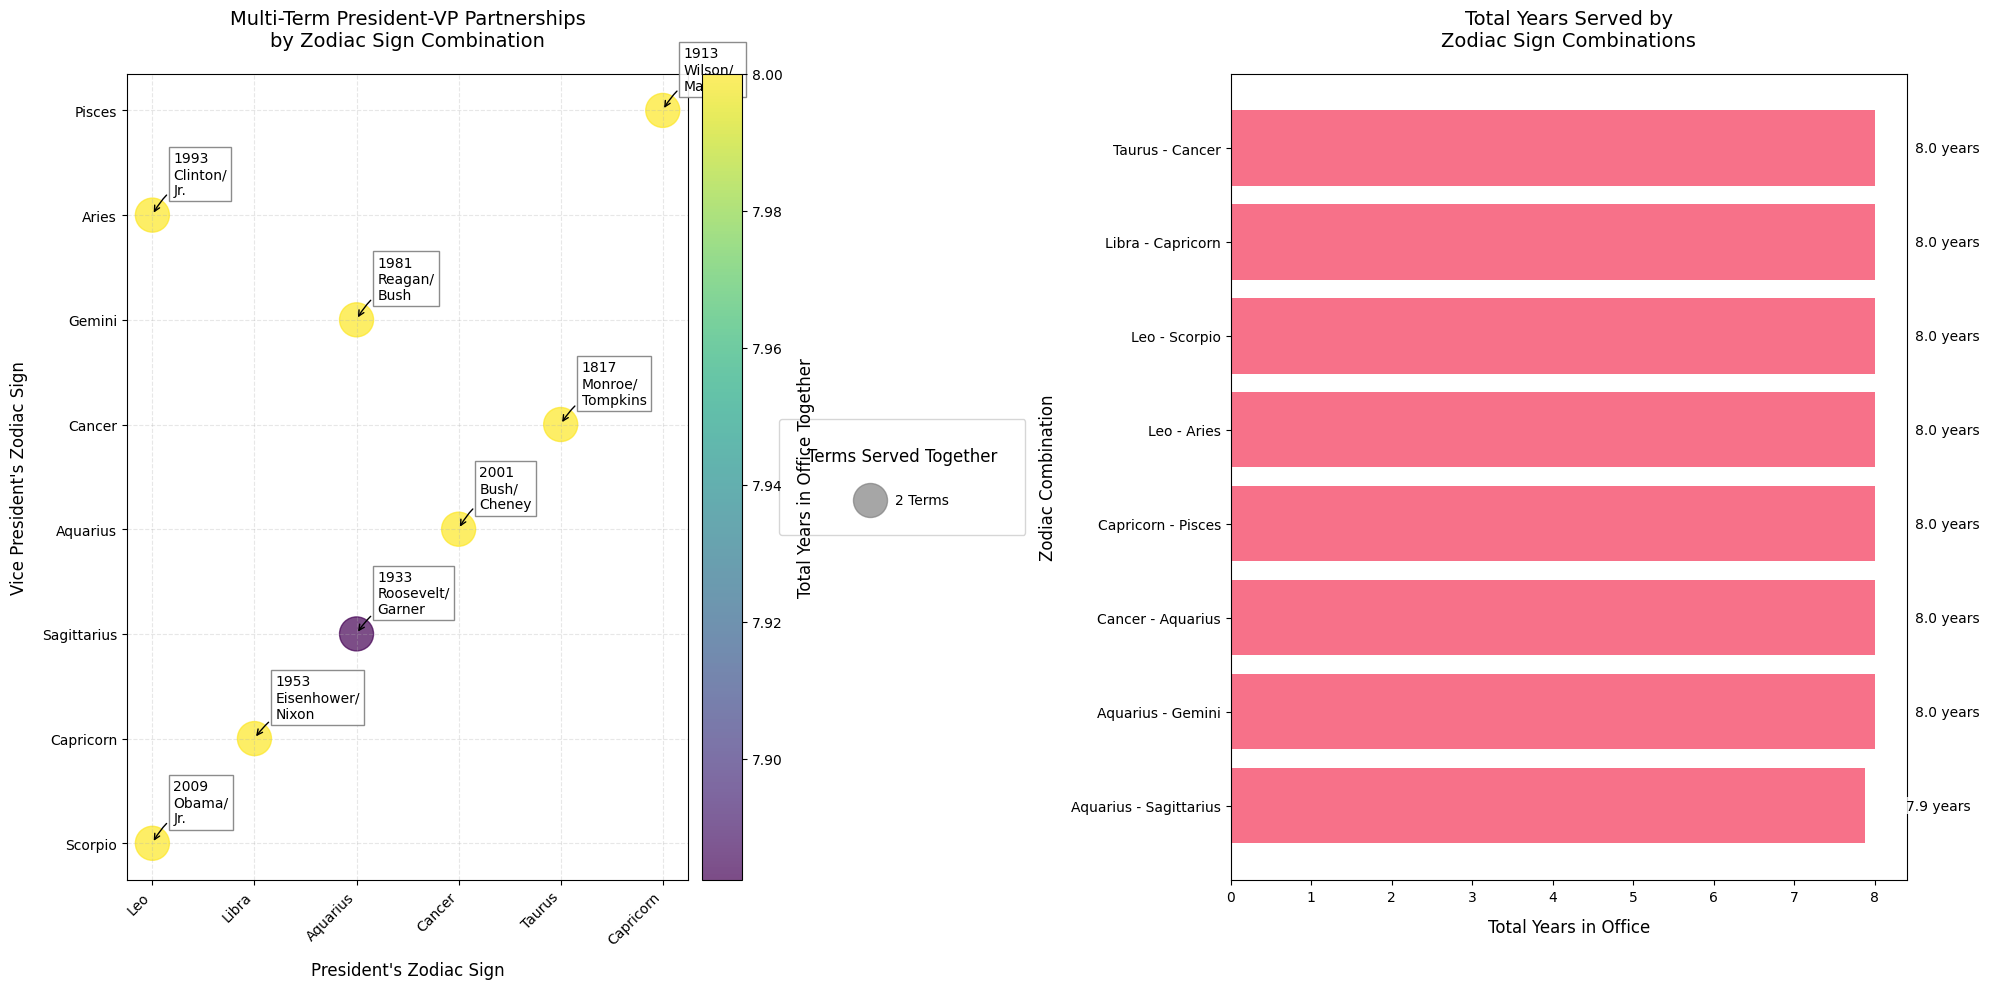


Multi-Term President-Vice President Duos:

Barack Hussein Obama (Leo) and Joseph "Joe" Robinette Biden Jr. (Scorpio)
  • Terms served together: 2
  • Total years in office: 8.0 years
  • Partnership began: 2009

Dwight David Eisenhower (Libra) and Richard Milhous Nixon (Capricorn)
  • Terms served together: 2
  • Total years in office: 8.0 years
  • Partnership began: 1953

Franklin Delano Roosevelt (Aquarius) and John Nance Garner (Sagittarius)
  • Terms served together: 2
  • Total years in office: 7.9 years
  • Partnership began: 1933

George Walker Bush (Cancer) and Richard "Dick" Bruce Cheney (Aquarius)
  • Terms served together: 2
  • Total years in office: 8.0 years
  • Partnership began: 2001

James Monroe (Taurus) and Daniel D. Tompkins (Cancer)
  • Terms served together: 2
  • Total years in office: 8.0 years
  • Partnership began: 1817

Ronald Wilson Reagan (Aquarius) and George Herbert Walker Bush (Gemini)
  • Terms served together: 2
  • Total years in office: 8.0 years
 

In [20]:
# Find president-VP duos who served together
def find_multi_term_duos():
    duos = []
    
    # Create a DataFrame with overlapping terms
    merged_df = pd.merge(
        prez_df, 
        viceprez_df,
        on=['start_term', 'end_term'],
        suffixes=('_prez', '_vp')
    )
    
    # Count how many terms each duo served together
    duo_counts = merged_df.groupby(['full_name_prez', 'full_name_vp']).size().reset_index(name='terms_together')
    multi_term_duos = duo_counts[duo_counts['terms_together'] > 1]
    
    # Get full information for each multi-term duo
    for _, duo in multi_term_duos.iterrows():
        prez_name = duo['full_name_prez']
        vp_name = duo['full_name_vp']
        
        duo_terms = merged_df[
            (merged_df['full_name_prez'] == prez_name) & 
            (merged_df['full_name_vp'] == vp_name)
        ]
        
        first_term = duo_terms.iloc[0]
        duos.append({
            'President': prez_name,
            'Vice_President': vp_name,
            'Terms_Together': duo['terms_together'],
            'Prez_Zodiac': first_term['zodiac_sign_prez'],
            'VP_Zodiac': first_term['zodiac_sign_vp'],
            'Start_Year': first_term['start_term'].split('-')[0],
            'Total_Years': (pd.to_datetime(duo_terms['end_term']).max() - 
                          pd.to_datetime(duo_terms['start_term']).min()).days / 365.25
        })
    
    return pd.DataFrame(duos)

# Get multi-term duos
duo_df = find_multi_term_duos()

if not duo_df.empty:
    # Create visualization with more space
    plt.figure(figsize=(20, 10))
    
    # Create a scatter plot
    plt.subplot(1, 2, 1)
    
    # Create scatter plot with different sizes
    sizes = duo_df['Terms_Together'] * 300  # Increased point sizes
    scatter = plt.scatter(duo_df['Prez_Zodiac'], 
                         duo_df['VP_Zodiac'],
                         s=sizes,
                         alpha=0.7,
                         c=duo_df['Total_Years'],  # Color by total years served
                         cmap='viridis')
    
    plt.title('Multi-Term President-VP Partnerships\nby Zodiac Sign Combination', fontsize=14, pad=20)
    plt.xlabel('President\'s Zodiac Sign', fontsize=12, labelpad=10)
    plt.ylabel('Vice President\'s Zodiac Sign', fontsize=12, labelpad=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Add a colorbar
    cbar = plt.colorbar(scatter, pad=0.02)
    cbar.set_label('Total Years in Office Together', fontsize=12, labelpad=10)
    cbar.ax.tick_params(labelsize=10)  # Set colorbar tick label size
    
    # Add labels for each point with both year and names
    for idx, row in duo_df.iterrows():
        label = f"{row['Start_Year']}\n{row['President'].split()[-1]}/\n{row['Vice_President'].split()[-1]}"
        plt.annotate(label,
                    (row['Prez_Zodiac'], row['VP_Zodiac']),
                    xytext=(15, 15), textcoords='offset points',
                    fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', pad=3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    
    # Add size legend with better formatting
    legend_elements = [plt.scatter([], [], s=n*300, c='gray', alpha=0.7, label=f'{n} Terms')
                      for n in sorted(duo_df['Terms_Together'].unique())]
    plt.legend(handles=legend_elements, 
              title='Terms Served Together',
              title_fontsize=12,
              fontsize=10,
              loc='center left', 
              bbox_to_anchor=(1.15, 0.5),
              borderpad=2,
              labelspacing=2)
    
    # Create a bar plot of the most successful combinations
    plt.subplot(1, 2, 2)
    duo_df['Zodiac_Combo'] = duo_df['Prez_Zodiac'] + ' - ' + duo_df['VP_Zodiac']
    combo_success = duo_df.groupby('Zodiac_Combo')['Total_Years'].sum().sort_values(ascending=True)
    
    bars = plt.barh(combo_success.index, combo_success.values)
    plt.title('Total Years Served by\nZodiac Sign Combinations', fontsize=14, pad=20)
    plt.xlabel('Total Years in Office', fontsize=12, labelpad=10)
    plt.ylabel('Zodiac Combination', fontsize=12, labelpad=10)
    
    # Adjust tick labels
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add value labels on bars with more space
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f} years',
                ha='left', va='center', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed information about the duos
    print("\nMulti-Term President-Vice President Duos:")
    for _, duo in duo_df.sort_values('Terms_Together', ascending=False).iterrows():
        print(f"\n{duo['President']} ({duo['Prez_Zodiac']}) and {duo['Vice_President']} ({duo['VP_Zodiac']})")
        print(f"  • Terms served together: {duo['Terms_Together']}")
        print(f"  • Total years in office: {duo['Total_Years']:.1f} years")
        print(f"  • Partnership began: {duo['Start_Year']}")
else:
    print("No president-vice president duos found who served multiple terms together.")